<a href="https://colab.research.google.com/github/iam-fern/Generate_addition_2X/blob/main/GQtest_cluster_data(y_hat)_add_delta_(1_2)_n60_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import os
import statistics as stats
import scipy.stats as ss
import scipy.stats as st
from scipy.stats import f_oneway
from scipy import stats
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import drive
from statsmodels.formula.api import ols
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_addition_2X/addition_delta_1.2'

In [4]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_add_delta_1.2_n60.csv')

In [5]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,43.460845,54.006427,1.443902,108.911175,109.318923,-0.407749
1,0.0,1.0,31.499808,70.205869,16.702290,128.407967,113.861436,14.546531
2,0.0,2.0,20.386574,37.203075,17.161825,84.751473,70.616349,14.135125
3,0.0,3.0,46.222900,82.578334,-8.204924,130.596309,140.187013,-9.590703
4,0.0,4.0,66.598601,44.140555,-14.371970,106.367185,121.739637,-15.372452
...,...,...,...,...,...,...,...,...
59995,999.0,55.0,40.356261,22.010644,4.229077,76.595982,72.784144,3.811838
59996,999.0,56.0,70.674519,58.685699,-23.448375,115.911843,136.703179,-20.791335
59997,999.0,57.0,29.854631,36.322156,-9.631838,66.544949,74.665683,-8.120734
59998,999.0,58.0,73.583188,63.231030,0.594466,147.408685,143.748471,3.660213


In [6]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2          e           Y       y_hat  \
rep   index                                                            
0.0   0.0    43.460845  54.006427   1.443902  108.911175  109.318923   
      1.0    31.499808  70.205869  16.702290  128.407967  113.861436   
      2.0    20.386574  37.203075  17.161825   84.751473   70.616349   
      3.0    46.222900  82.578334  -8.204924  130.596309  140.187013   
      4.0    66.598601  44.140555 -14.371970  106.367185  121.739637   
...                ...        ...        ...         ...         ...   
999.0 55.0   40.356261  22.010644   4.229077   76.595982   72.784144   
      56.0   70.674519  58.685699 -23.448375  115.911843  136.703179   
      57.0   29.854631  36.322156  -9.631838   66.544949   74.665683   
      58.0   73.583188  63.231030   0.594466  147.408685  143.748471   
      59.0   94.282994  90.120332  -5.447918  188.955408  189.033705   

                 e_hat  
rep   index             
0.0   0.0    -0.407749  
      1.0    14.546531  
      2.0    14.135125  
      3.0    -9.590703  
      4.0   -15.372452  
...                ...  
999.0 55.0    3.811838  
      56.0  -20.791335  
      57.0   -8.120734  
      58.0    3.660213  
      59.0   -0.078297  

[60000 rows x 6 columns]

In [7]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2          e           Y       y_hat  \
rep   index                                                            
0.0   0.0    43.460845  54.006427   1.443902  108.911175  109.318923   
      1.0    31.499808  70.205869  16.702290  128.407967  113.861436   
      2.0    20.386574  37.203075  17.161825   84.751473   70.616349   
      3.0    46.222900  82.578334  -8.204924  130.596309  140.187013   
      4.0    66.598601  44.140555 -14.371970  106.367185  121.739637   
...                ...        ...        ...         ...         ...   
999.0 55.0   40.356261  22.010644   4.229077   76.595982   72.784144   
      56.0   70.674519  58.685699 -23.448375  115.911843  136.703179   
      57.0   29.854631  36.322156  -9.631838   66.544949   74.665683   
      58.0   73.583188  63.231030   0.594466  147.408685  143.748471   
      59.0   94.282994  90.120332  -5.447918  188.955408  189.033705   

                 e_hat  
rep   index             
0.0   0.0    -0.407749  
      1.0    14.546531  
      2.0    14.135125  
      3.0    -9.590703  
      4.0   -15.372452  
...                ...  
999.0 55.0    3.811838  
      56.0  -20.791335  
      57.0   -8.120734  
      58.0    3.660213  
      59.0   -0.078297  

[60000 rows x 6 columns]

In [8]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,43.460845,54.006427,1.443902,108.911175,109.318923,-0.407749
1,0.0,1.0,31.499808,70.205869,16.702290,128.407967,113.861436,14.546531
2,0.0,2.0,20.386574,37.203075,17.161825,84.751473,70.616349,14.135125
3,0.0,3.0,46.222900,82.578334,-8.204924,130.596309,140.187013,-9.590703
4,0.0,4.0,66.598601,44.140555,-14.371970,106.367185,121.739637,-15.372452
...,...,...,...,...,...,...,...,...
59995,999.0,55.0,40.356261,22.010644,4.229077,76.595982,72.784144,3.811838
59996,999.0,56.0,70.674519,58.685699,-23.448375,115.911843,136.703179,-20.791335
59997,999.0,57.0,29.854631,36.322156,-9.631838,66.544949,74.665683,-8.120734
59998,999.0,58.0,73.583188,63.231030,0.594466,147.408685,143.748471,3.660213


In [9]:
table.set_index(['rep', 'index'], inplace=True)

In [10]:
table

x1         x2          e           Y       y_hat  \
rep   index                                                            
0.0   0.0    43.460845  54.006427   1.443902  108.911175  109.318923   
      1.0    31.499808  70.205869  16.702290  128.407967  113.861436   
      2.0    20.386574  37.203075  17.161825   84.751473   70.616349   
      3.0    46.222900  82.578334  -8.204924  130.596309  140.187013   
      4.0    66.598601  44.140555 -14.371970  106.367185  121.739637   
...                ...        ...        ...         ...         ...   
999.0 55.0   40.356261  22.010644   4.229077   76.595982   72.784144   
      56.0   70.674519  58.685699 -23.448375  115.911843  136.703179   
      57.0   29.854631  36.322156  -9.631838   66.544949   74.665683   
      58.0   73.583188  63.231030   0.594466  147.408685  143.748471   
      59.0   94.282994  90.120332  -5.447918  188.955408  189.033705   

                 e_hat  
rep   index             
0.0   0.0    -0.407749  
      1.0    14.546531  
      2.0    14.135125  
      3.0    -9.590703  
      4.0   -15.372452  
...                ...  
999.0 55.0    3.811838  
      56.0  -20.791335  
      57.0   -8.120734  
      58.0    3.660213  
      59.0   -0.078297  

[60000 rows x 6 columns]

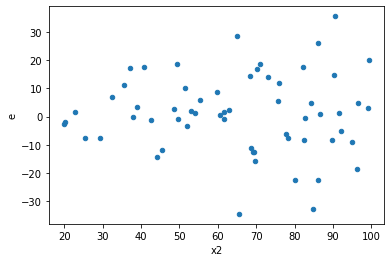

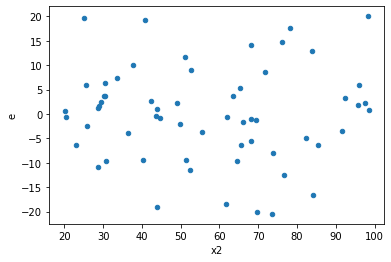

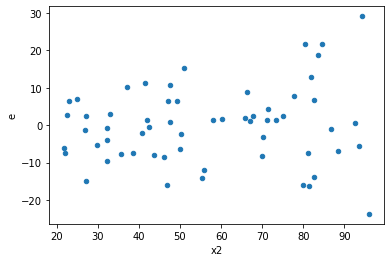

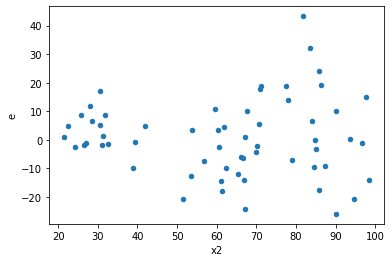

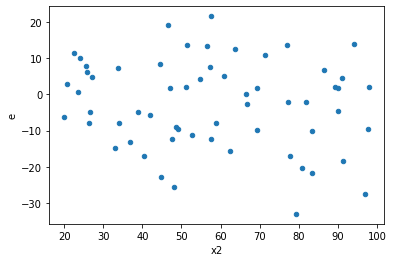

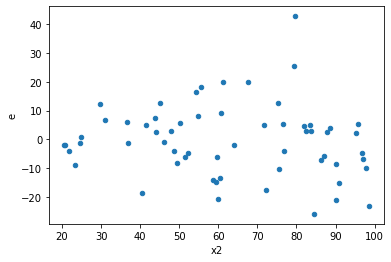

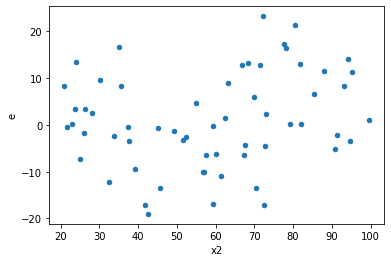

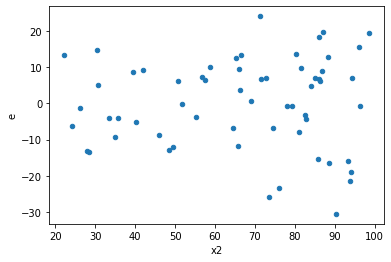

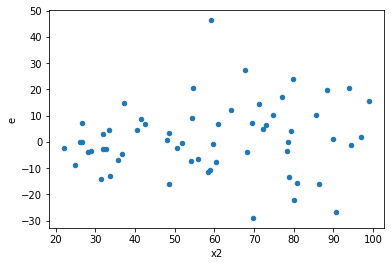

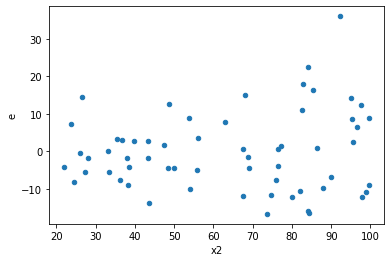

In [11]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [12]:
def get_result(run_replicate):
    new_table = table.loc[run_replicate]

    # show index
    new_table.reset_index(inplace=True)

    new_table.drop(['index'], axis=1, inplace=True)


    # แบ่งข้อมูลออกเป็น 2 กลุ่มด้วย k-mean

    #Set number of clusters
    x = new_table[["y_hat"]]

    #Another important parameter is init, which defines the method initialization to use (default='k-means++').
    #k-means++ algorithm uses the seeding technique for centroid initialization which is better than the random initialization method.
    kmeans = KMeans(n_clusters=2, init='k-means++', random_state=0).fit(x)

    #Generate cluster predictions and store in y_kmeans
    y_kmeans = kmeans.predict(x)

    #kmean_clusters.astype(float)
    kmean_clusters = pd.DataFrame({"clusters" : y_kmeans})

    # เชื่อมข้อมูลทั้ง 2 DataFrame เข้าด้วยกันด้วยคำสั่ง pd.concat
    data_clusters = pd.concat([new_table, kmean_clusters], axis=1)
    #data_clusters.reset_index(inplace=True)

    # กลุ่มที่ 1
    data_cluster0 = data_clusters[data_clusters.clusters == 0]

    y = data_cluster0[['Y']]
    x = data_cluster0[['x1', 'x2']]
    x = sm.add_constant(x)
    model1 = sm.OLS(y, x).fit()

    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # กลุ่มที่ 2
    data_cluster1 = data_clusters[data_clusters.clusters == 1]

    y = data_cluster1[['Y']]
    x = data_cluster1[['x1', 'x2']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()

    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # คำนวณค่าสถิติ
    GQ_test_clusters = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test_clusters, df1, df2)))
    p_greater = ss.f.cdf(GQ_test_clusters, df1, df2)
    p_less = 1.0-ss.f.cdf(GQ_test_clusters, df1, df2)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test_clusters=[]
list_result_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]
#list_result_test01=[]

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less=get_result(run_replicate)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test_clusters.append(GQ_test_clusters)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future versi

In [13]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
4.0,30.0,26.0,3616.565211535265,3675.207789436889,120.55217371784217,141.35414574757266,1.1725557606154697,0.6845363095078363,0.6577318452460819,0.34226815475391814,Reject001=1 : Homoscedasticity
6.0,31.0,25.0,2015.3343077695758,2730.4814595513053,65.01078412159922,109.21925838205222,1.680017551822839,0.1870174780195515,0.9064912609902243,0.09350873900977574,Reject001=1 : Homoscedasticity
7.0,32.0,24.0,3660.8740712336316,5018.974412750815,114.40231472605099,209.12393386461727,1.827969428462944,0.129938861100253,0.9350305694498735,0.0649694305501265,Reject001=1 : Homoscedasticity
9.0,15.0,41.0,755.280718182927,5320.821468693352,50.3520478788618,129.77613338276467,2.5773754762662944,0.016607716695000718,0.9916961416524996,0.008303858347500359,Reject001=1 : Homoscedasticity
11.0,23.0,33.0,1315.5953924686698,4674.871235097578,57.19979967255086,141.6627646999266,2.476630434213006,0.01701014790552624,0.9914949260472369,0.00850507395276312,Reject001=1 : Homoscedasticity
12.0,20.0,36.0,656.055575772488,6682.445093894843,32.8027787886244,185.6234748304123,5.6587728748999835,7.050947065545543e-06,0.9999964745264672,3.5254735327727715e-06,Reject001=0 : Heteroscedasticity
15.0,24.0,32.0,2642.8593036741163,4806.5782938750335,110.11913765308817,150.2055716835948,1.3640278600509221,0.40750770198385955,0.7962461490080702,0.20375385099192977,Reject001=1 : Homoscedasticity
18.0,34.0,22.0,3062.105377051603,2212.8728611047036,90.06192285445891,100.5851300502138,1.1168441319286566,0.7994710787613162,0.6002644606193419,0.3997355393806581,Reject001=1 : Homoscedasticity
21.0,27.0,29.0,3158.3581538571416,3520.2924204305214,116.97622792063487,121.389393807949,1.0377270319428349,0.919081784666615,0.5404591076666925,0.4595408923333075,Reject001=1 : Homoscedasticity


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                     if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,15.0,41.0,4673.72575874015,6509.260992542639,311.58171724934334,158.76246323274728,0.5095371597355232,0.15813898149791789,Reject001=1 : Homoscedasticity
1.0,29.0,27.0,3427.42669033602,1540.6670723850852,118.1871272529662,57.061743421669824,0.482808447484603,0.05739030645892441,Reject001=1 : Homoscedasticity
2.0,27.0,29.0,4222.465906333103,1657.4375584368686,156.3876261604853,57.15301925644374,0.36545742562645717,0.010268744826558278,Reject001=1 : Homoscedasticity
3.0,22.0,34.0,6280.723153170852,3461.12650891972,285.48741605322056,101.79783849763882,0.3565755713683074,0.013368077917478592,Reject001=1 : Homoscedasticity
4.0,30.0,26.0,3616.565211535265,3675.207789436889,120.55217371784217,141.35414574757266,1.1725557606154697,0.6845363095078363,Reject001=1 : Homoscedasticity
5.0,25.0,31.0,4100.5477418256105,4374.009520970242,164.02190967302442,141.09708132162072,0.8602331335057368,0.7057143369668921,Reject001=1 : Homoscedasticity
6.0,31.0,25.0,2015.3343077695758,2730.4814595513053,65.01078412159922,109.21925838205222,1.680017551822839,0.1870174780195515,Reject001=1 : Homoscedasticity
7.0,32.0,24.0,3660.8740712336316,5018.974412750815,114.40231472605099,209.12393386461727,1.827969428462944,0.129938861100253,Reject001=1 : Homoscedasticity
8.0,24.0,32.0,6514.334069294701,3468.4020990902536,271.43058622061255,108.38756559657043,0.39931964597562153,0.022758099068576013,Reject001=1 : Homoscedasticity


In [15]:
result_show['Result_test'].value_counts()

Reject001=1 : Homoscedasticity      840
Reject001=0 : Heteroscedasticity    160
Name: Result_test, dtype: int64